### Wordclouds

In [1]:
import json
import pickle
from BuildGraphModule import *
from graviz import wordclouds
from scipy.misc import imread
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('paper.json', 'r') as f:
    data = json.load(f)

In [3]:
# Uniform strings - Authors
for i in list(data.keys()):
    try:
        for j in range(len(data[i]['Authors'])):
            t = unidecode(data[i]['Authors'][j])
            t.encode("ascii")
            data[i]['Authors'][j] = t.lower().replace('.','')
    except:
        continue

In [4]:
# Uniform strings - EPFL Authors
for i in list(data.keys()):
    dic = []
    try:
        for j in range(len(data[i]['Epfl authors'])):
            string = list(data[i]['Epfl authors'][j].keys())[0]
            t = unidecode(string)
            t.encode("ascii")
            dic += [{t.lower().replace('.','') : list(data[i]['Epfl authors'][j].values())[0]}]
        data[i]['Epfl authors'] = dic
    except:
        continue

In [5]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) >= 1993:
            data_cut[paper] = data[paper]
    except:
        continue

In [6]:
# (lab,website)
dict_lab_site = {}
# (lab, num publications)
dict_labs = defaultdict(int)
# (lab, list of papers)
dict_labs_paper = defaultdict(list)
i = 0
for paper in list(data_cut.keys()):
    try:
        if len(data_cut[paper]['Labs involved']) == 1:
            dict_lab_site[list(data_cut[paper]['Labs involved'][0].keys())[0]] = list(data_cut[paper]['Labs involved'][0].values())[0]
            dict_labs[list(data_cut[paper]['Labs involved'][0].keys())[0]] += 1
            dict_labs_paper[list(data_cut[paper]['Labs involved'][0].keys())[0]] += [paper]
            
        else:
            for lab in data_cut[paper]['Labs involved']:
                dict_lab_site[list(lab.keys())[0]] = list(lab.values())[0]     
                dict_labs[list(lab.keys())[0]] += 1
                dict_labs_paper[list(lab.keys())[0]] += [paper]
    except:
        continue

In [7]:
# Get dictionary (lab,school)
def school_lab(dict_lab_site, name_school):
    school = pickle.load(open(name_school + '.p', 'rb'))
    lab_school = {}
    for i in list(dict_lab_site.keys()):
        for nodes in list(school.keys()):
            list_node = school[nodes]
            if i in list_node:
                lab_school[i] = name_school
                break
            else:
                continue
    return lab_school

In [8]:
list_schools = ['ENAC', 'SB', 'IC', 'STI', 'SV']
dict_lab_school = {}
for school in list_schools:
    dict_lab_school = {**dict_lab_school, **school_lab(dict_lab_site, school)}

In [9]:
def concat_words(keywords):
    text = ' '.join([i for i in keywords])
    words = text.split(' ')
    return ' '.join([word for word in words if len(word) > 2])

switzerland_mask = imread('Images/switzerland_mask.png')
black_circle = imread('Images/black_circle.png')

In [10]:
# Get keywords from papers pubished between 1960 and 2017
keywords_all_time = wordclouds.get_keywords_by_years(data, 1960, 2017)
keywords_all_time = concat_words(keywords_all_time)

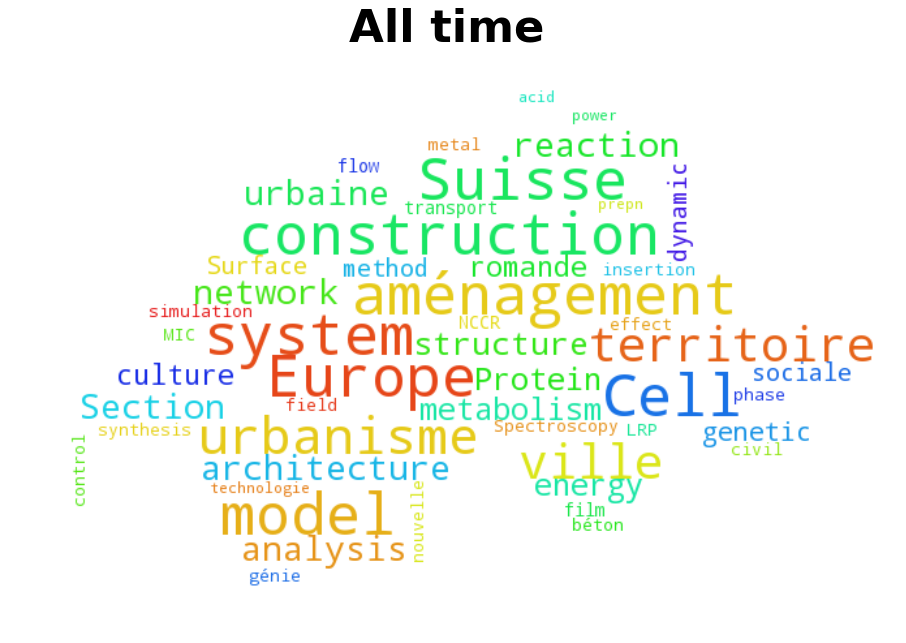

In [11]:
# Generate the word cloud
wordcloud = WordCloud(background_color="white", mask=switzerland_mask, max_font_size=45, random_state=42, max_words=50, width=3200, height=1800)
wordcloud.generate(keywords_all_time)

# Display the generated cloud
plt.figure(figsize=(20,10)).suptitle("All time", fontsize=45, fontweight='bold')
plt.imshow(wordcloud, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig('Images/All_time.png', format="PNG", dpi=300)
plt.show()

In [12]:
# Get keywords from papers pubished in consecutive decades
keywords = [[wordclouds.get_keywords_by_years(data, 1960 + 10 * i, 1960 + 10 * (i + 1))] for i in range(6)]
keywords = [list(map(concat_words, k)) for k in keywords]

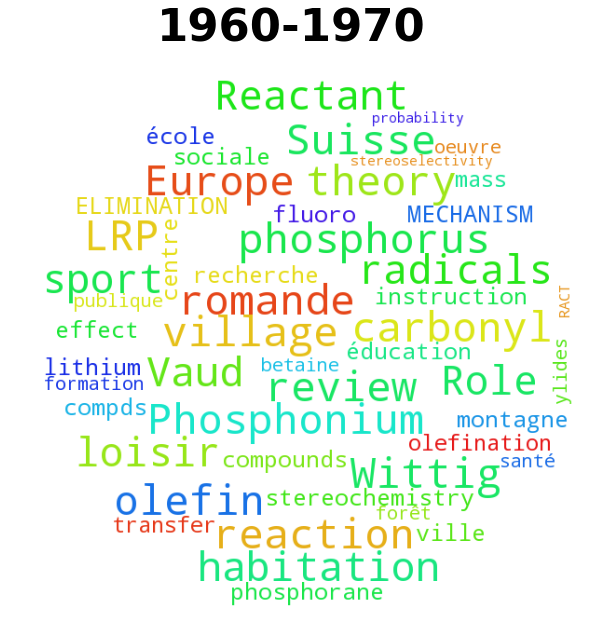

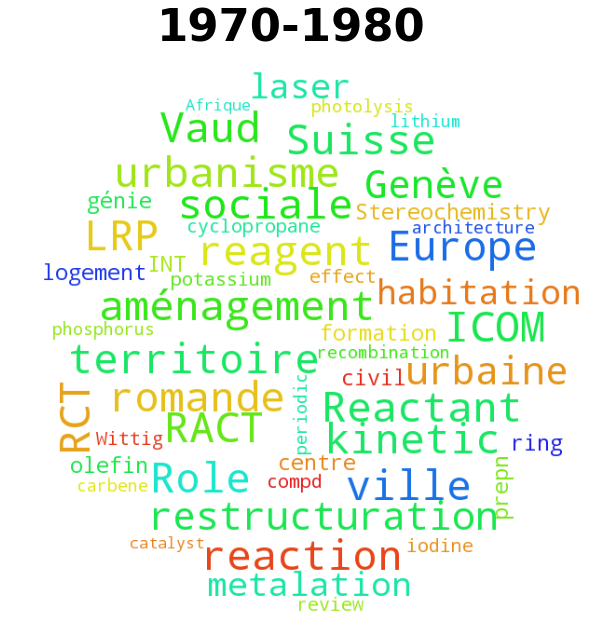

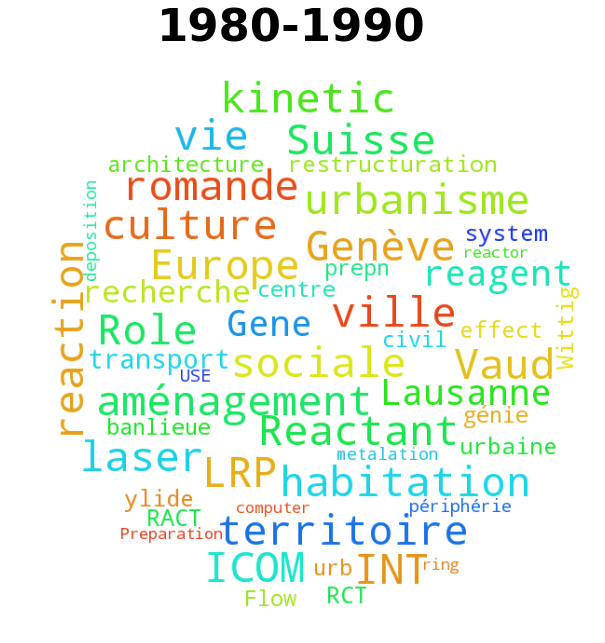

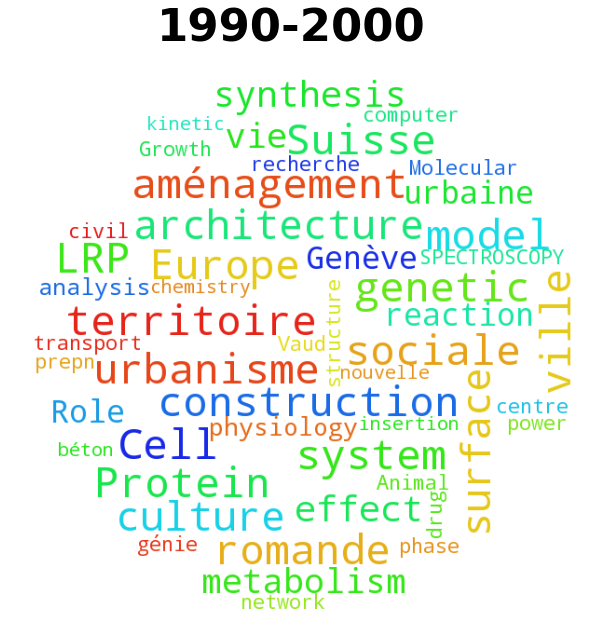

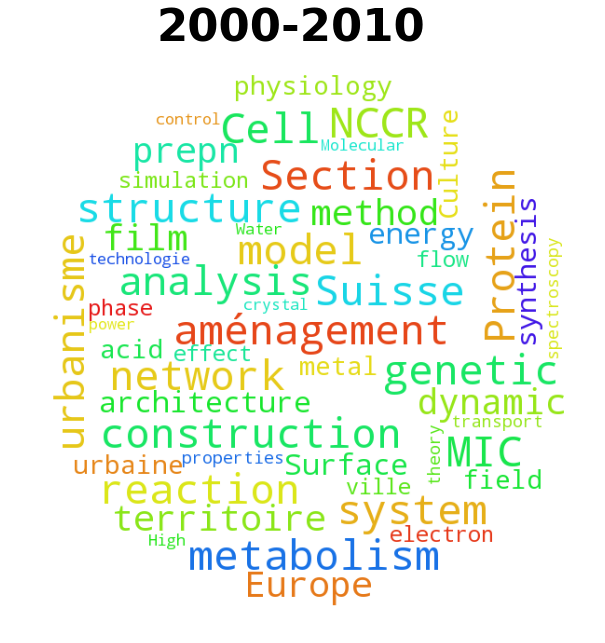

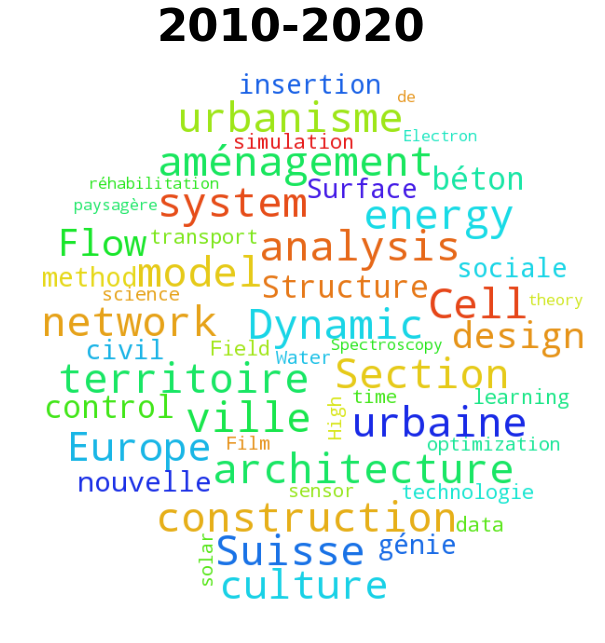

In [13]:
# Generate the word cloud
for i, k in enumerate(keywords):
    wordcloud = WordCloud(background_color="white", mask=black_circle, max_font_size=45, random_state=42, max_words=50, width=3200, height=1800)
    wordcloud.generate(k[0])
    
    # Display the generated cloud
    title = str(1960 + 10 * i) + '-' + str(1960 + 10 * (i + 1))
    plt.figure(figsize=(20,10)).suptitle(title, fontsize=45, fontweight='bold')
    plt.imshow(wordcloud, cmap=plt.cm.gray)
    plt.axis("off")
    plt.savefig('Images/' + title + '.png', format="PNG", dpi=300)
    plt.show()

In [14]:
# Get keywords from papers pubished in consecutive decades
keywords = [(wordclouds.get_keywords_by_school(data, dict_lab_school, school), school) for school in list_schools]
keywords = [(' '.join([i for i in (' '.join(k[0]).split(' ')) if len(i) > 2]), k[1]) for k in keywords]

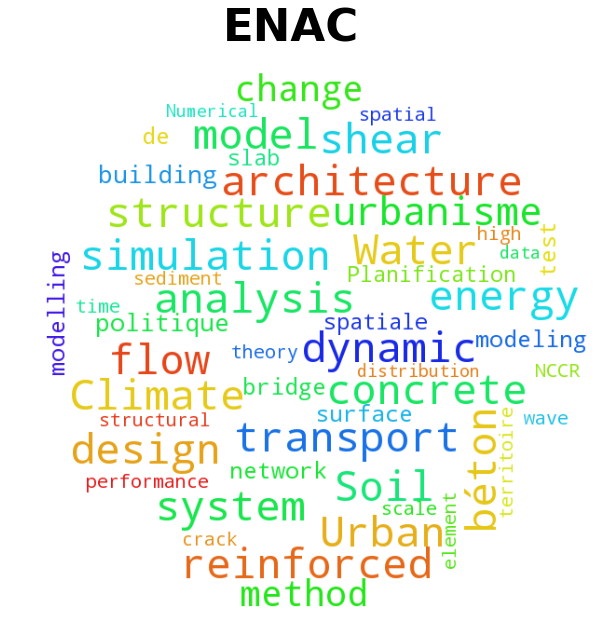

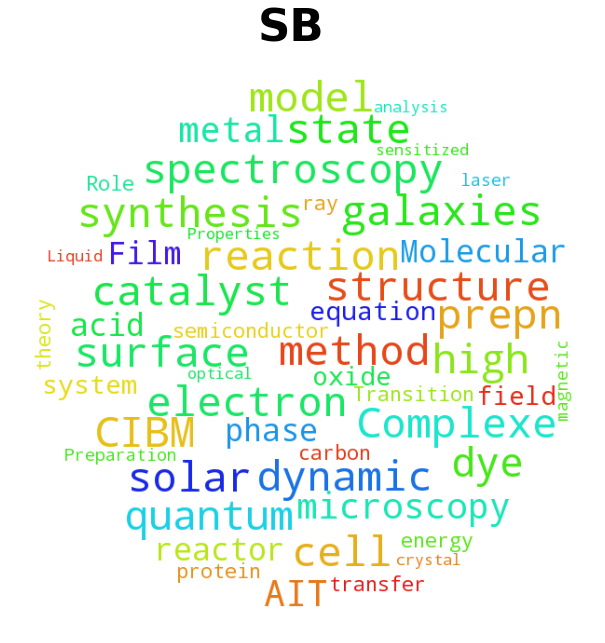

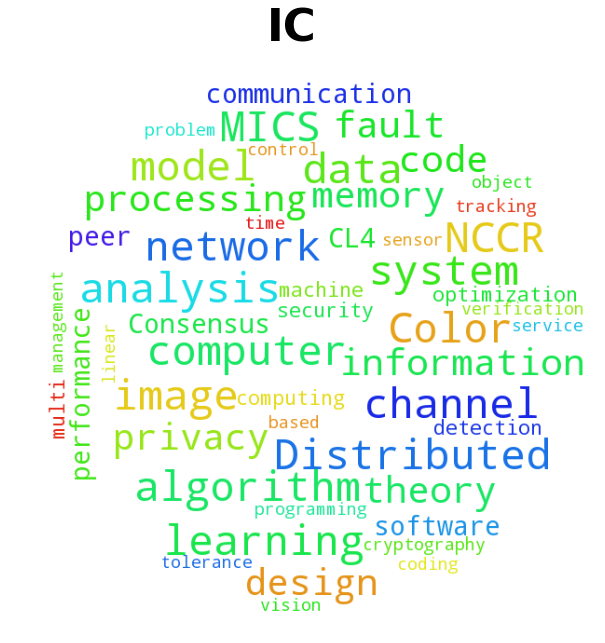

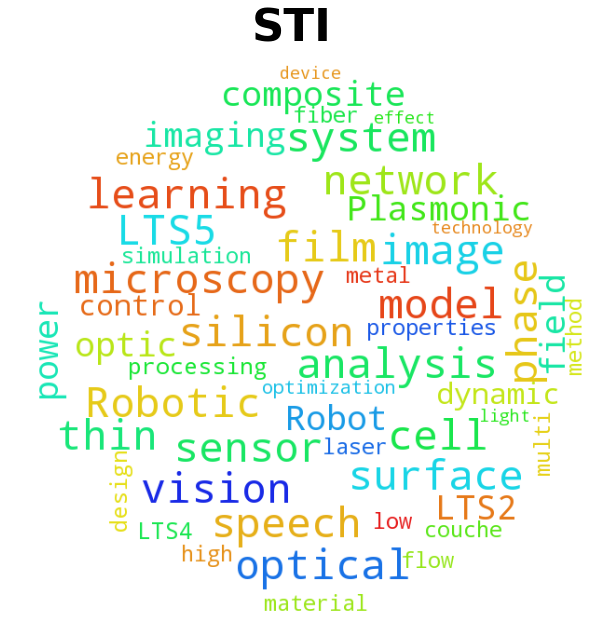

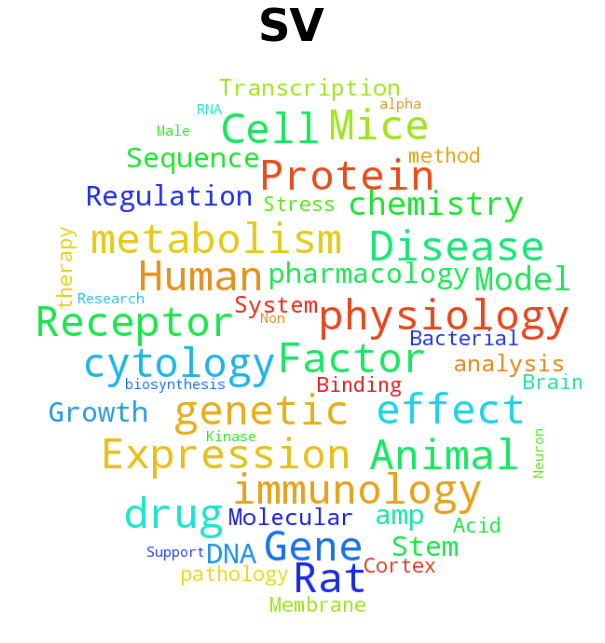

In [15]:
# Generate the word cloud
for i, k in enumerate(keywords):
    wordcloud = WordCloud(background_color="white", mask=black_circle, max_font_size=45, random_state=42, max_words=50, width=3200, height=1800)
    wordcloud.generate(k[0])
    
    # Display the generated cloud
    title = str(k[1])
    plt.figure(figsize=(20,10)).suptitle(title, fontsize=45, fontweight='bold')
    plt.imshow(wordcloud, cmap=plt.cm.gray)
    plt.axis("off")
    plt.savefig('Images/' + title + '.png', format="PNG", dpi=300)
    plt.show()